# Synth Secrets, Part 1: What's In A Sound?
_Original article: [http://www.soundonsound.com/sos/may99/articles/synthsec.htm][0]
**PART 1: WHAT'S IN A SOUND?**
 
In the first part of this new series exploring the world of subtractive synthesis, **Gordon Reid** goes right back to basics. What are waveforms and harmonics, where do they come from, and how does the theory relate to what we actually hear?

Despite the title of this article, I won't be revealing any actual secrets during the course of this series. But before you turn the page in disgust, what I will be doing is taking a look at the basic principles of that most common form of sound synthesis, subtractive synthesis (these principles are well known, and therefore hardly secret), and, later on in the series, how these principles are applied on specific synthesizers. The aim is that if you have a synth that works on subtractive principles, and you know how to get sounds out of it that you like, but don't understand why or how it makes the sounds it does, this series should fill in some of the blanks (they're the 'secrets', you see). OK, maybe we should have called the series Why Your Synth Does What It Does When You Twiddle That Knob Or Slide That Slider... but, let's face it, that's not exactly a catchy name. So Synth Secrets it is. First things first, then: what is subtractive synthesis? 

The name 'subtractive synthesis' is derived from the method itself, wherein you attenuate or remove harmonics from harmonically rich waveforms to create new sounds. You can do this in a static fashion to create simple tones, or you can use the facilities offered by the filters, envelope generators, and modulators in your synthesizer to make dynamic sounds that change as time passes. But... you may be lost already. What actually are harmonics? What are waveforms? Where do they come from? This month, I'm going right back to basics, and answering just those three questions. The stuff about VCFs, EGs and LFOs will come later.

# It's All Greek To Me
To answer these fundamental questions, we have to jump into the Sound On Sound time machine (it's tucked away somewhere behind the photocopier) and head off into the dim recesses of the past. Back before physical modelling, before samplers, before analogue polysynths, even before monosynths...

Actually, we're in serious Dr Who territory here, because we need to head back 2,500 years and reacquaint ourselves with an Ionian chap by the name of Pythagoras. Pythagoras was perhaps the world's first pure mathematician, yet we know relatively little about him or his achievements (much of what we do know about him may be no more than legend — in contrast to what every schoolboy knows, the Babylonians discovered Pythagoras's theorem about 1,000 years before Pythagoras was born).

One of the lesser-known discoveries attributed to Pythagoras was that plucking two similar strings stretched to the same tension gave a pleasing sound if their lengths were related by simple integers (ie. whole numbers).

For example, if one string was half the length of the other (a 1:2 relationship) the result sounded quite nice. If the relationship was 2:3, that sounded pleasant too.

In [2]:
# play integer and non-interger pairs to show what sounds nice vs what doenst?
# several pairs text boxes + play button
# 1:2, 2:3 and a non-integer one (maybe 1.21346706544)
# mvp: hardcoded, next: editable numbers
# people can play all 3 and see which sound good
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
from fractions import Fraction
%matplotlib inline
rate = 16000.
duration = .25
t = np.linspace(0., duration, int(rate * duration))
def synth(frequency_1, frequency_2):
    x = np.sin(frequency_1 * 2. * np.pi * t) + np.sin(frequency_2 * 2. * np.pi * t)
    ratio = Fraction(frequency_1,frequency_2)
    print('{}hz and {}hz, with ratios {}:{}'.format(frequency_1, frequency_2, ratio.numerator, ratio.denominator))
    display(Audio(x, rate=rate, autoplay=True))
#synth(880, 1320)
#synth(880, 960)
import ipywidgets
fundemental_harmonic = 440
def set_harmonic(y):
    synth(fundemental_harmonic, y)
    return y
ipywidgets.interact(set_harmonic, y=(220,220*3,20));
#ipywidgets.interact(set_harmonic, y=(220,250*3,220));

interactive(children=(IntSlider(value=440, description='y', max=660, min=220, step=20), Output()), _dom_classe…

Pythagoras was blown away by his discovery, and placed numerology at the heart of his philosophy. Unfortunately, he and his followers then went off the rails a bit and tried to determine similar numerical relationships for the periods and orbits of the five known planets, the sun and the moon, thus giving rise to the mythical 'music of the spheres'. If they had only looked at the very small instead of the very large (discovering Quantum Mechanics in the process) they would have been much more successful.

But why did Pythagoras's strings have integer relationships? Why weren't similar, pleasing sounds generated by two strings when one of them was 1.21346706544 times the length of the other?

# Let's Get Plucking
To start answering this, let's consider a stretched string that is fixed at both ends, but free to vibrate along its length. Figure 1 shows such a string at rest.

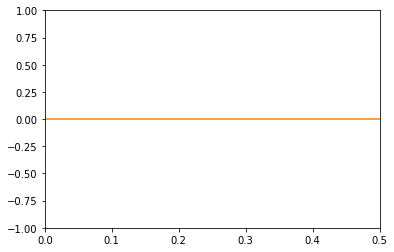

In [56]:
fig, ax = plt.subplots()

ax.set_xlim((0, 0.5))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)
x = np.linspace(0, 0.5, 200)
y = np.sin(0*x)
line1, = ax.plot(x, y)

Now imagine that we gently pluck the string exactly halfway between the ends. As you might imagine, this causes it to vibrate in the way shown in Figure 2.

In [51]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

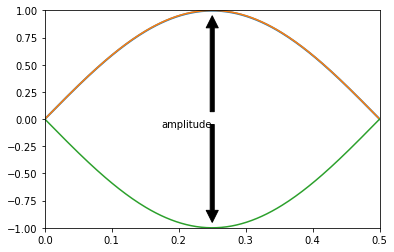

In [83]:
# show string virbating alongside matching sine diagram
fig, ax = plt.subplots()

ax.set_xlim((0, 0.5))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)
number_of_points = 200
x = np.linspace(0, 0.5, number_of_points)
y = np.sin(2 * np.pi * x)
z = np.sin(2 * np.pi * -x)
top, = ax.plot(x, y)
bottom, = ax.plot(x, z)
line3, = ax.plot([], [], lw=2)

from matplotlib.text import OffsetFrom

ax.annotate('amplitude',
            xy=(0.5, 1), xycoords='axes fraction',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('',
            xy=(0.5, 0), xycoords='axes fraction',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = np.sin((2 * np.pi) * (x - (0.01 * i)))
    #line3.set_data(x, y)
    y = np.sin((2 * np.pi) * x) * y[number_of_points//2]
    line.set_data(x, y)

    return (line,line3)

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50, 
                               blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml(default_mode='loop'))

This is an example of a 'standing wave'. It does not run up and down the string like waves on the surface of the sea, but vibrates up and down. If the vibration (or 'oscillation') is as simple as that shown in Figure 2, a point at the centre of the string moves in a simple, repeating pattern called a sine wave (see Figure 3). We call this pattern the oscillation's 'waveform', and the frequency with which the waveform completes one 'cycle' is called the 'fundamental' frequency of the string.

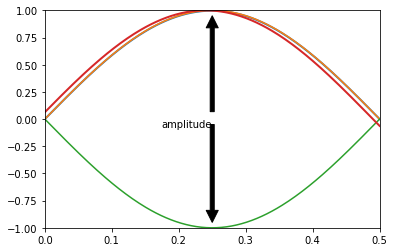

In [82]:
# show string virbating alongside matching sine diagram
#todo: timer showing how long 1 cycle takes (+convert that time into hz)

fig, ax = plt.subplots()

ax.set_xlim((0, 0.5))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)
number_of_points = 200
x = np.linspace(0, 0.5, number_of_points)
y = np.sin(2 * np.pi * x)
z = np.sin(2 * np.pi * -x)
top, = ax.plot(x, y)
bottom, = ax.plot(x, z)
line3, = ax.plot([], [], lw=2)

from matplotlib.text import OffsetFrom

ax.annotate('amplitude',
            xy=(0.5, 1), xycoords='axes fraction',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('',
            xy=(0.5, 0), xycoords='axes fraction',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = np.sin((2 * np.pi) * (x - (0.01 * i)))
    line3.set_data(x, y)
    y = np.sin((2 * np.pi) * x) * y[number_of_points//2]
    line.set_data(x, y)

    return (line,line3)

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50, 
                               blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml(default_mode='loop'))

The fundamental mode is, however, not the only way in which the string can vibrate — although because it is fixed at both ends, the number of ways and the speeds with which it can do so are severely constrained. Imagine placing your finger in the exact centre of the string (but so that the string can still vibrate along its entire length) and plucking it on one side or the other. You can see from Figure 4 that a standing wave with half the wavelength of the original looks perfectly feasible.

Likewise, if you place your finger one-third of the way along the string, a standing wave of one-third the wavelength of the original should be possible (Figure 5) and so on.

Indeed, these standing waves can exist at all the integer divisions of the wave shown in Figure 2, and we call these the 'harmonics' of the fundamental frequency.

In [ ]:
# diagram where you can 'place finger' in the position of all the different intergrs parts

If you study the maths of standing waves, you'll discover that you can represent such a wave as two 'running' waves moving in opposite directions along the string (no, don't ask why, or we'll be here forever). Knowing this, however, leads us to a simple conclusion: if you halve the wavelength, the frequency of the 'running' waves required will double. Similarly, if you divide the wavelength by a factor of three, you triple the frequency; quarter the wavelength and you multiply the frequency by four, and so on... Only whole numbers will work because, if you tried to introduce a non-integer change in the frequency, the string would need to be somewhere other than at the zero position at one of its ends (ie. Part of the way through an complete cycle), and this isn't possible because, of course, the ends are fixed.

In [ ]:
# demo why non-interger numbers don't work

Anyway, we've now answered our first question by identifying the harmonics which can be produced by a simple oscillator: they are the permissible modes of vibration. Of course, this analysis doesn't only apply to a vibrating string. Consider the air in an enclosed space such as a cubic room. Forgetting for a moment any complicating factors such as furniture, the air can vibrate anywhere in the room except at the walls, floor, and ceilings. In other words, the vibrations in the room are constrained in the same way as those on a string. This is why regular rooms have 'resonances' — they are the harmonic frequencies of the room itself. And this is why cathedral organs work — pipes are also simple harmonic oscillators.

In all but some esoteric cases, the first harmonic (the fundamental, called f) is the pitch that you'll perceive when you listen to the sound of the plucked string. The second harmonic (also called the first 'overtone') is half the wavelength of the fundamental and therefore twice the frequency. In isolation we would perceive this as a tone exactly one octave above the fundamental.

In [ ]:
# demo playing second harmonic over first harmonic?

The third harmonic has a frequency of 3f (which is the perfect fifth, one and a half octaves above the fundamental) and the fourth harmonic, with a frequency of 4f, defines the second octave above the fundamental. The next three harmonics then lie within the next octave, and the eighth harmonic defines the third octave above the fundamental. And so it goes on...

In [ ]:
# then demo arbiatry harmonics? Or at least the ones mentioned

This is the information we need to understand Pythagoras's observation. The shorter of the two strings in the 1:2 relationship is producing a fundamental at the same frequency as the second harmonic of the longer one. It's exactly one octave higher. In the example of the 2:3 strings, the third harmonic of the longer string is at the same frequency as the second harmonic of the shorter one. In other words, the harmonic structures of the two strings are closely related to one another, and we hear this as musically 'pleasing'.

In [ ]:
# demo how 1:2, 2:3 map to harmonics?

# The Nature Of A Sound
Now consider this: when you pluck a string, you don't hear the sound of a single harmonic. The conditions for creating such a pure tone are — in the real world — almost impossibly precise, so any naturally occurring tone is likely to be a composite of many harmonics present in differing amounts. At any given moment it is this combination that determines the waveform of the sound and, because of the number of harmonics present, this waveform will be much more convoluted than the simple sine wave shown in Figure 3 (above). You only have to look at a sample of a guitar or a human voice in a waveform editor to see how complex a real waveform can be.

In [ ]:
#show complex waveform?

This would make analysis of sound — or its resynthesis — almost impossibly difficult, had it not been for a French mathematician named Jean Baptiste Joseph Fourier. Another guy with a colourful life, Fourier was in turns a teacher, a secret policeman, a political prisoner, governor of Egypt, Prefect of Isère and Rhône, and a friend of Napoleon. Despite this, he still found time to determine that any periodic motion, no matter how complex, could be broken down into its harmonic components. This procedure is called Fourier Analysis in his honour. Furthermore, Fourier analysis also shows that, given a set of harmonics, you can derive a unique waveform.

Hold on a second... the waveform defines the harmonics, and the harmonics determine the waveform? Clearly, harmonics and the waveforms are just two ways of expressing the same thing. This is a key point: the natures of musical tones are defined by the numbers and amplitudes of the harmonics contained within them, and any given set of harmonics gives us a given waveform. So when we look at the oscillators on a synth and see things such as 'square' waves or 'sawtooth' waves, this is simply a shorthand way of saying, "this setting generates a particular set of harmonics with amplitudes of x, y and z..."

In [ ]:
# examples of harmonics mapping to wavforms?

# Subtractive Synthesis
So let's apply these ideas to a synthesizer. Look at the waveform in Figure 6 (above). You would never get this from a plucked string, but you'll find an approximation to it on almost every synthesizer ever built. It's an ideal 'sawtooth' wave, so named because of its shape.

This waveform has a simple harmonic relationship, expressed as follows:

Every harmonic is present, and the amplitude of the nth harmonic is 1/n times that of the fundamental.

In [ ]:
#graph of the harmonics, labeled (perhaps make frequency adjustable)

OK, so it doesn't look so simple when written in English but, believe me, there are far nastier ones than this. Anyway, Figure 7 shows the first 10 harmonics in a sawtooth wave, and you can see how they taper off at higher and higher frequencies.

But what happens if you truncate this series of harmonics? Let's say you remove all but the first five of them (for which you need a device called a 'filter'). Figure 8 shows this spectrum, and Figure 9 shows the waveform to which it corresponds.

As you can see, the new waveform looks different from the sawtooth wave. It sounds different too. But the only difference between them is that you have truncated the harmonic series of the sawtooth so that only the first handful of harmonics remain. In other words, you have used a 'filter' to 'subtract' harmonics, thereby creating a new waveform, and thus a new sound.

Welcome to the world of subtractive synthesis!

In [ ]:
# interactive square wav harmonics, let them be added or delted and show/play matching wavform